In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import lightgbm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [2]:
# set options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 데이터 확인 및 전처리

In [3]:
vote_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\train.csv", encoding="utf-8")
print("dataset shape: ", vote_df.shape)
vote_df.sample(10)

dataset shape:  (36425, 78)


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
20594,11573,2.0,478,1.0,891,4.0,738,2.0,726,2.0,706,4.0,882,4.0,328,1.0,636,4.0,1438,4.0,1259,4.0,364,5.0,152,4.0,579,2.0,811,2.0,384,2.0,159,4.0,224,2.0,1369,4.0,456,2.0,430,20s,3,1,2,Female,1,1,White,Agnostic,1,6,2,1,0,4,0,2,1,6,2,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
13292,4335,1.0,286,2.0,2144,5.0,3258,1.0,2150,5.0,5045,1.0,2160,5.0,1076,3.0,9711,1.0,5852,4.0,2158,1.0,1606,5.0,4784,5.0,953,1.0,1068,4.0,1110,1.0,1702,1.0,1005,3.0,1506,5.0,663,3.0,1178,10s,1,1,2,Male,1,1,White,Agnostic,2,2,4,6,1,6,1,1,1,5,2,0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
36321,2968,2.0,803,4.0,3344,5.0,643,1.0,699,2.0,2523,2.0,705,3.0,1368,1.0,1435,4.0,2204,4.0,1037,5.0,808,3.0,1026,4.0,1404,3.0,514,4.0,811,5.0,1122,1.0,589,5.0,1117,4.0,1232,4.0,1403,50s,2,1,3,Female,1,2,White,Christian_Other,7,1,2,0,3,6,2,4,5,3,1,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1
32853,15838,1.0,224,5.0,1111,5.0,406,1.0,541,1.0,761,1.0,253,1.0,541,4.0,2596,1.0,814,5.0,713,1.0,568,5.0,558,5.0,1238,1.0,341,5.0,624,5.0,928,1.0,447,1.0,775,5.0,296,5.0,508,10s,2,1,2,Female,2,1,White,Atheist,6,5,3,5,1,0,5,3,0,6,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1
26080,32392,1.0,363,4.0,1356,2.0,1726,1.0,585,1.0,923,1.0,343,1.0,508,4.0,1815,1.0,922,5.0,568,1.0,742,5.0,893,5.0,888,1.0,272,4.0,542,4.0,955,1.0,347,1.0,651,4.0,1172,5.0,963,20s,3,1,2,Male,2,1,White,Atheist,4,1,2,2,2,2,4,2,2,4,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1
15883,41229,2.0,664,3.0,2194,4.0,1056,1.0,899,1.0,763,1.0,252,5.0,651,1.0,1050,5.0,1521,5.0,1059,3.0,1247,5.0,1006,4.0,1316,2.0,1434,1.0,467,2.0,716,3.0,490,4.0,849,3.0,1040,4.0,2504,10s,1,1,3,Female,1,1,White,Christian_Catholic,5,1,0,4,3,2,3,5,1,3,3,0,0,0,0,0,1,0,1,1,1,1,1,0,1,0,1,1
24996,18753,1.0,321,4.0,968,5.0,517,2.0,833,2.0,907,1.0,284,1.0,472,4.0,1912,2.0,1776,5.0,726,1.0,1080,5.0,849,5.0,567,1.0,367,4.0,444,4.0,563,4.0,738,2.0,636,5.0,553,5.0,493,10s,2,2,4,Male,2,1,Asian,Christian_Other,2,2,5,1,0,2,2,1,5,0,3,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0
32336,34204,3.0,569,1.0,663,2.0,524,1.0,374,4.0,1002,4.0,373,3.0,749,2.0,594,4.0,946,2.0,494,4.0,610,4.0,759,2.0,382,4.0,508,4.0,558,1.0,730,4.0,500,4.0,813,2.0,502,1.0,644,20s,3,1,1,Male,2,1,White,Agnostic,5,2,2,0,4,0,1,2,5,3,3,1,0,1,0,1,1,0,1,1,1,1,1,0,1,0,1,1
4557,2344,1.0,586,4.0,1966,2.0,2820,2.0,771,1.0,1201,2.0,468,2.0,699,1.0,1378,5.0,3690,4.0,1909,5.0,1041,4.0,2063,4.0,547,3.0,577,3.0,902,2.0,662,4.0,889,5.0,2259,5.0,482,1.0,682,20s,2,1,2,Female,1,1,White,Christian_Other,2,2,0,4,0,5,0,5,1,2,1,0,1,0,1,1,1,0,1,1,0,1,1,0,1,0,1,1
26556,18258,4.0,2231,5.0,2016,2.0,2064,5.0,1073,5.0,1140,5.0,1018,5.0,466,5.0,940,2.0,2674,5.0,2543,5.0,1952,2.0,1150,3.0,821,3.0,815,3.0,1686,2.0,981,2.0,1464,5.0,733,5.0,872,4.0,870,20s,4,2,3,Female,1,2,Asian,Hindu,2,2,0,2,5,2,0,4,1,2,3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1


In [4]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36425 entries, 0 to 36424
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       36425 non-null  int64  
 1   QaA         36425 non-null  float64
 2   QaE         36425 non-null  int64  
 3   QbA         36425 non-null  float64
 4   QbE         36425 non-null  int64  
 5   QcA         36425 non-null  float64
 6   QcE         36425 non-null  int64  
 7   QdA         36425 non-null  float64
 8   QdE         36425 non-null  int64  
 9   QeA         36425 non-null  float64
 10  QeE         36425 non-null  int64  
 11  QfA         36425 non-null  float64
 12  QfE         36425 non-null  int64  
 13  QgA         36425 non-null  float64
 14  QgE         36425 non-null  int64  
 15  QhA         36425 non-null  float64
 16  QhE         36425 non-null  int64  
 17  QiA         36425 non-null  float64
 18  QiE         36425 non-null  int64  
 19  QjA         36425 non-nul

In [5]:
vote_df.describe()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.00000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000
mean,22740.586520,2.131942,9.392264e+02,2.897598,2.053925e+03,3.661414,1461.583775,1.750748,1.499025e+03,2.320494,1.897114e+03,2.167742,1.911749e+03,2.560220,1.287380e+03,2.316047,2.243674e+03,3.166699,3.508262e+03,3.574084,2.647131e+03,3.822704,1.910627e+03,4.330734,4.253209e+03,3.509979,1.665842e+03,2.635772,956.472258,3.213672,1410.536884,3.067756,1.632666e+03,2.842169,1.114106e+03,2.827948,2.632989e+03,3.431187,1.163574e+03,3.224104,2.059381e+03,2.548250,1.272752,2.621002,1.170487,1.387975,3.018174,2.61930,1.755717,3.025614,1.333342,2.462759,2.022704,3.509952,2.272340,4.317968,2.179574,0.453178,0.080494,0.163294,0.118600,0.709623,0.934468,0.208730,0.868717,0.895072,0.329087,0.938888,0.971613,0.202663,0.945532,0.393988,0.947536,0.926781
std,13118.110333,1.199763,1.372469e+04,1.568342,1.984665e+04,1.431303,8097.443081,1.046655,1.109992e+04,1.370584,1.508537e+04,1.349821,8.217648e+04,1.509689,9.914887e+03,1.460773,1.373760e+04,1.482101,9.409606e+04,1.360288,6.022463e+04,1.368946,2.086329e+04,1.144399,4.095916e+05,1.375125,2.834511e+04,1.475278,5753.950736,1.478189,8745.676887,1.492889,2.626450e+04,1.405662,2.285452e+04,1.426399,1.657403e+05,1.374757,7.501528e+03,1.522649,4.413002e+04,0.941273,0.449247,5.438894,0.468163,0.640297,2.005182,1.89422,1.676886,2.036558,1.451165,1.998749,1.779602,1.971593,1.845983,1.724866,0.761658,0.497810,0.272060,0.369639,0.323322,0.453943,0.247465,0.406407,0.337715,0.306465,0.469888,0.239539,0.166078,0.401989,0.226942,0.488639,0.222964,0.260499
min,0.000000,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11403.000000,1.000000,4.040000e+02,1.000000,8.760000e+02,2.000000,651.000000,1.000000,6.810000e+02,1.000000,8.360000e+02,1.000000,5.050000e+02,1.000000,5.490000e+02,1.000000,1.081000e+03,2.000000,1.257000e+03,2.000000,9.040000e+02,3.000000,8.600000e+02,4.000000,8.060000e+02,2.000000,6.510000e+02,1.000000,430.000000,2.000000,638.000000,2.000000,7.050000e+02,2.000000,4.620000e+02,2.000000,7.950000e+02,2.000000,5.290000e+0

In [6]:
# 불균형 분포인지 확인
print(vote_df['voted'].value_counts())
unsatisfied_cnt = vote_df[vote_df['voted'] == 1].voted.count()
total_cnt = vote_df.voted.count()
print("unsatisfied 비율은 {0:.2f}".format(unsatisfied_cnt / total_cnt))

0    19918
1    16507
Name: voted, dtype: int64
unsatisfied 비율은 0.45


선거 투표 여부
- 0 = No
- 1 = Yes

In [7]:
# NA값 확인
print(vote_df.isna().sum())

index         0
QaA           0
QaE           0
QbA           0
QbE           0
QcA           0
QcE           0
QdA           0
QdE           0
QeA           0
QeE           0
QfA           0
QfE           0
QgA           0
QgE           0
QhA           0
QhE           0
QiA           0
QiE           0
QjA           0
QjE           0
QkA           0
QkE           0
QlA           0
QlE           0
QmA           0
QmE           0
QnA           0
QnE           0
QoA           0
QoE           0
QpA           0
QpE           0
QqA           0
QqE           0
QrA           0
QrE           0
QsA           0
QsE           0
QtA           0
QtE           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
tp01          0
tp02          0
tp03          0
tp04          0
tp05          0
tp06          0
tp07          0
tp08          0
tp09          0
tp10          0
urban         0
voted         0
wf_01   

In [8]:
# 예측한 값으로 성능을 평가하는 함수
def get_clf_eval(y_test, pred=None):
    confusion = confusion_matrix(y_test, pred) # 오차 행렬
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # F1
    roc_auc = roc_auc_score(y_test, pred_proba) # ROC-AUC
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 인덱스 빼기

### 결손값 처리

In [9]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['education', 'engnat', 'hand', 'urban']
for i in range(97, 117):  # 질문을 답할 때까지의 시간
    s = 'Q' + chr(i) + 'E'
    zero_features.append(s)

# 전체 데이터 건수
total_count = vote_df['education'].count()
print("전체 데이터 건수는 ", total_count)
print()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고 퍼센트 계산
for feature in zero_features:
    zero_count = vote_df[vote_df[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))
print()
    
# tp 범위 검사
tp_features = []
for i in range(1, 11):
    s = 'tp' + chr(48+(i//10)) + chr(48+(i%10))
    tp_features.append(s)
    
# 피처별로 반복하면서 데이터 값이 01~07을 벗어난 데이터 건수 추출하고 퍼센트 계산
for feature in tp_features:
    cnt = vote_df[vote_df[feature] < 1][feature].count() + vote_df[vote_df[feature] > 7][feature].count()
    print('{0} 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, cnt, 100*cnt/total_count))
print()

print("value > 7\tvalue == 7\tvalue < 0")
for feature in tp_features:
    cnt1 = vote_df[vote_df[feature] > 7][feature].count()
    cnt2 = vote_df[vote_df[feature] == 0][feature].count() # tp__ 데이터 결손값이 모두 0임을 확인
    cnt3 = vote_df[vote_df[feature] < 0][feature].count()
    print("%d\t\t%d\t\t%d" % (cnt1, cnt2, cnt3))
    
zero_features = zero_features + tp_features


전체 데이터 건수는  36425

education 0 건수는 432, 퍼센트는 1.19 %
engnat 0 건수는 63, 퍼센트는 0.17 %
hand 0 건수는 135, 퍼센트는 0.37 %
urban 0 건수는 258, 퍼센트는 0.71 %
QaE 0 건수는 0, 퍼센트는 0.00 %
QbE 0 건수는 0, 퍼센트는 0.00 %
QcE 0 건수는 0, 퍼센트는 0.00 %
QdE 0 건수는 0, 퍼센트는 0.00 %
QeE 0 건수는 0, 퍼센트는 0.00 %
QfE 0 건수는 0, 퍼센트는 0.00 %
QgE 0 건수는 0, 퍼센트는 0.00 %
QhE 0 건수는 1, 퍼센트는 0.00 %
QiE 0 건수는 1, 퍼센트는 0.00 %
QjE 0 건수는 1, 퍼센트는 0.00 %
QkE 0 건수는 2, 퍼센트는 0.01 %
QlE 0 건수는 0, 퍼센트는 0.00 %
QmE 0 건수는 0, 퍼센트는 0.00 %
QnE 0 건수는 0, 퍼센트는 0.00 %
QoE 0 건수는 0, 퍼센트는 0.00 %
QpE 0 건수는 1, 퍼센트는 0.00 %
QqE 0 건수는 1, 퍼센트는 0.00 %
QrE 0 건수는 0, 퍼센트는 0.00 %
QsE 0 건수는 0, 퍼센트는 0.00 %
QtE 0 건수는 0, 퍼센트는 0.00 %

tp01 건수는 3822, 퍼센트는 10.49 %
tp02 건수는 4356, 퍼센트는 11.96 %
tp03 건수는 9348, 퍼센트는 25.66 %
tp04 건수는 4414, 퍼센트는 12.12 %
tp05 건수는 12682, 퍼센트는 34.82 %
tp06 건수는 7148, 퍼센트는 19.62 %
tp07 건수는 7858, 퍼센트는 21.57 %
tp08 건수는 2547, 퍼센트는 6.99 %
tp09 건수는 7027, 퍼센트는 19.29 %
tp10 건수는 1158, 퍼센트는 3.18 %

value > 7	value == 7	value < 0
0		3822		0
0		4356		0
0		9348		0
0		4414		0
0		126

In [10]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
vote_df[zero_features] = vote_df[zero_features].replace(0, vote_df[zero_features].mean())

### 이상값 처리

<AxesSubplot:>

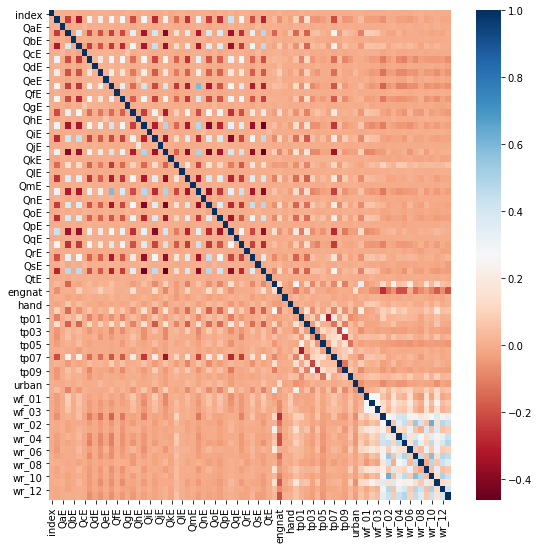

In [11]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = vote_df.corr()
sns.heatmap(corr, cmap="RdBu")

In [12]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[df["tp07"]==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값보다 크거나, 최소값보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [13]:
outlier_index = get_outlier(df=vote_df, column="QjE", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)
print("이상치 데이터 인덱스 개수:", len(outlier_index))

outlier_index = get_outlier(df=vote_df, column="QkE", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)
print("이상치 데이터 인덱스 개수:", len(outlier_index))

outlier_index = get_outlier(df=vote_df, column="wr_12", weight=1.5)
print("이상치 데이터 인덱스:", outlier_index)
print("이상치 데이터 인덱스 개수:", len(outlier_index))

이상치 데이터 인덱스: Int64Index([   11,   168,   262,   277,   312,   401,   409,   426,   456,
              465,
            ...
            36077, 36150, 36155, 36202, 36205, 36322, 36352, 36370, 36392,
            36393],
           dtype='int64', length=871)
이상치 데이터 인덱스 개수: 871
이상치 데이터 인덱스: Int64Index([    1,   103,   111,   191,   253,   291,   312,   319,   328,
              384,
            ...
            35694, 35934, 36042, 36063, 36129, 36150, 36199, 36205, 36244,
            36274],
           dtype='int64', length=743)
이상치 데이터 인덱스 개수: 743
이상치 데이터 인덱스: Int64Index([  119,   149,   291,   407,   430,   564,   589,   593,   734,
              756,
            ...
            35449, 35513, 35520, 35581, 36118, 36122, 36194, 36336, 36356,
            36400],
           dtype='int64', length=507)
이상치 데이터 인덱스 개수: 507


### 데이터 변환

In [18]:
# 레이블 인코딩 적용 : age_group
encoder = LabelEncoder()
encoder.fit(vote_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
print("인코딩 변환값:", labels)
print("인코딩 클래스:", encoder.classes_)
print("디코딩 원본값:", encoder.inverse_transform([1,2,3,4,5]))

인코딩 변환값: [2 1 2 ... 3 4 5]
인코딩 클래스: ['+70s' '10s' '20s' '30s' '40s' '50s' '60s']
디코딩 원본값: ['10s' '20s' '30s' '40s' '50s']


In [32]:
# 원-핫 인코딩 적용 : gender, race, religion
# gender
encoder = LabelEncoder()
encoder.fit(vote_df['gender'])
labels = encoder.transform(vote_df['gender'])
labels = labels.reshape(-1, 1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print("gender 원-핫 인코딩 데이터")
print(oh_labels.toarray())
print("gender 원-핫 인코딩 데이터 차원")
print(oh_labels.shape)
print()

# race
encoder = LabelEncoder()
encoder.fit(vote_df['race'])
labels = encoder.transform(vote_df['race'])
labels = labels.reshape(-1, 1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print("race 원-핫 인코딩 데이터")
print(oh_labels.toarray())
print("race 원-핫 인코딩 데이터 차원")
print(oh_labels.shape)
print()

# religion
encoder = LabelEncoder()
encoder.fit(vote_df['religion'])
labels = encoder.transform(vote_df['religion'])
labels = labels.reshape(-1, 1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print("religion 원-핫 인코딩 데이터")
print(oh_labels.toarray())
print("religion 원-핫 인코딩 데이터 차원")
print(oh_labels.shape)

gender 원-핫 인코딩 데이터
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
gender 원-핫 인코딩 데이터 차원
(36425, 2)

race 원-핫 인코딩 데이터
[[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
race 원-핫 인코딩 데이터 차원
(36425, 7)

religion 원-핫 인코딩 데이터
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
religion 원-핫 인코딩 데이터 차원
(36425, 12)


# 모델 학습